## How Forecast Maps are Created 

This code shows how weather analysts use National Blended Model data to create weather maps. Scroll down to see the results. Each section of code has some handy notes. 


In [260]:
import pygrib
import numpy as numpy

# Random Library Imports
import os,glob
import matplotlib.cm as cm

# Utilities to plot maps
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

# More Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader


## Here we grab the forecast data from today, November 30th 2021 (1 file/hour) 

In [261]:
grb_path = "blend.t09z.core.f001.co"
grib_list = sorted(glob.glob(f"{grb_path}*.grib2"))
list(grib_list)

['blend.t09z.core.f001.co.grib2']

## Grabbing the first grib file from our list will allow us to explore the data
* Each entry of the file is a different variable (specified at different heights for most)

In [262]:
# grab first file in list (conus)
grbs = pygrib.open(grib_list[0])
grb = grbs.read()

In [279]:
# play with cape values - second in the list of variables

thunder_grib = grb[27]
thunder,thunlat,thunlon = thunder_grib.data() # -> gets all the plot data in one call
#lat,lon = cape_grib.latlons() #-> just different way of accessing lat/lon; same outcome

precip_grib = grb[21]
precip,lat,lon = precip_grib.data() 

print(numpy.amax(precip))
print(numpy.amin(precip))

295.85
245.05


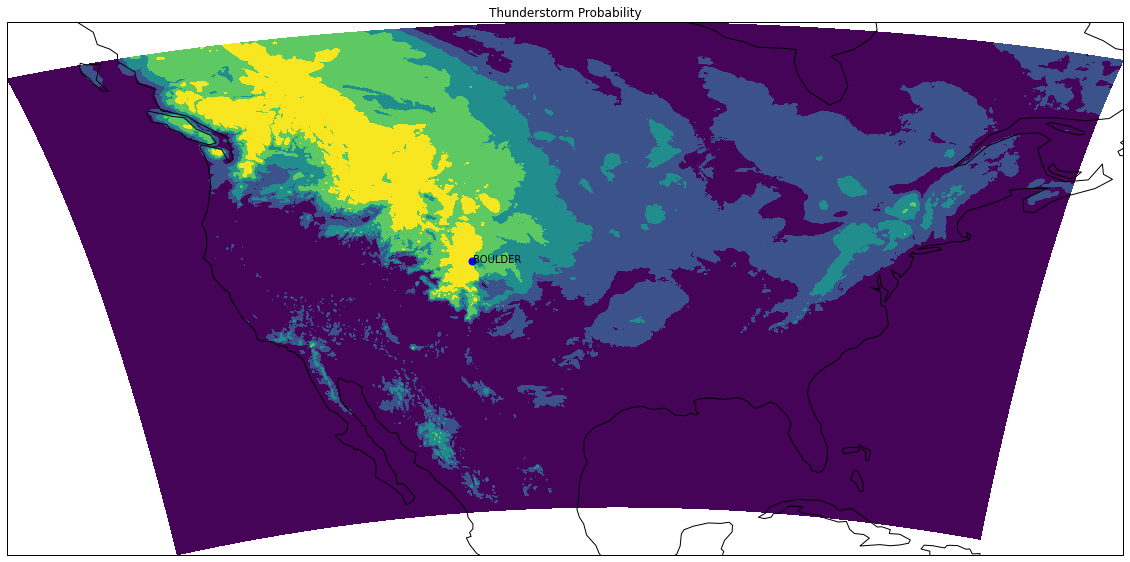

In [276]:
fig = plt.figure(figsize=(20, 20))

ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(thunlon, thunlat, thunder, 60,
            transform=ccrs.PlateCarree())


#21 rain
#22 not working
#23 snow
#24 Ice pellets/freezing rain
#25 ?
#26 ?
#27 thunderstorm

ax.text(-105.2705, 40.015, 'BOULDER ', transform=ccrs.Geodetic()) #Plots Boulder City as a point
ax.plot(-105.3, 40.1, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.coastlines() #Coastlines
ax.set_aspect(1)
plt.title('Thunderstorm Probability')

plt.show()

(-0.5, 2344.5, 1596.5, -0.5)

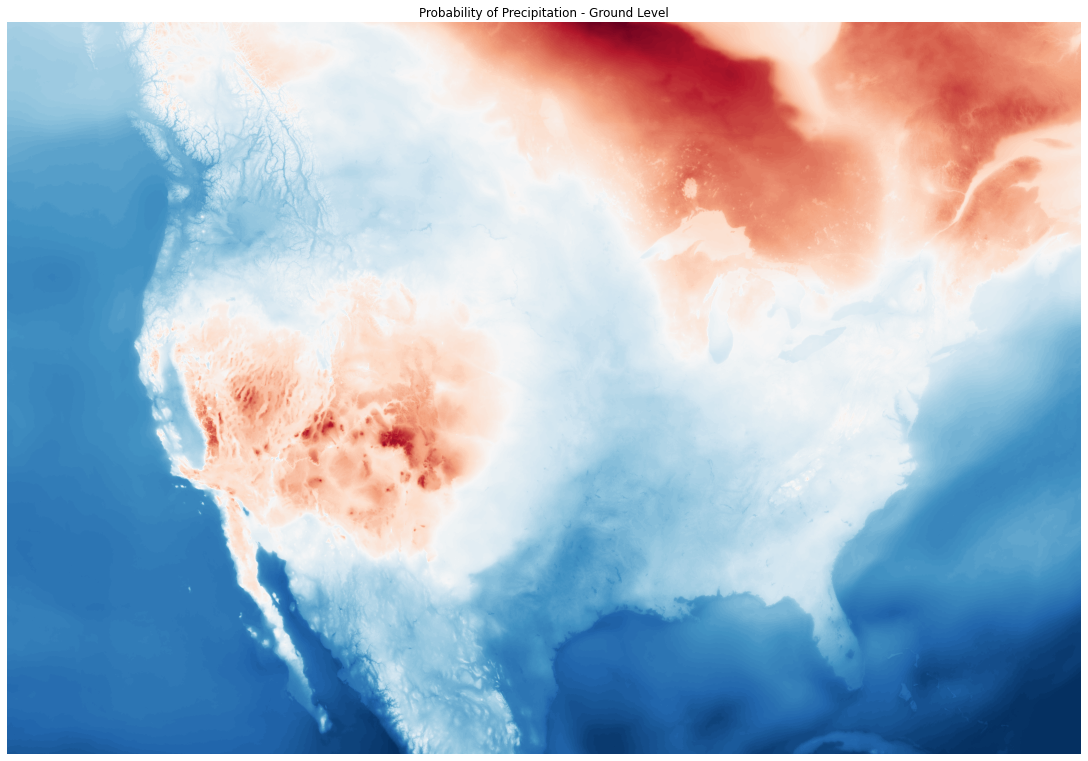

In [283]:
#https://github.com/koldunovn/FESOM_SST_shaded_by_U/blob/main/FESOM_SST_shaded_by_U.ipynb

fig, ax = plt.subplots(
            1,
            1,
            constrained_layout=True,
            figsize=(15,15),

        )


ax.imshow(numpy.flipud(precip), cmap=cm.RdBu,  vmin=245, vmax=295)
ax.imshow(numpy.flipud(precip), alpha=0.0, cmap=cm.gray, vmin=-3, vmax=10)
ax.set_title('Probability of Precipitation - Ground Level')
ax.axis('off')